<a href="https://colab.research.google.com/github/joaovitordeon/ENEM_2016_codenation/blob/master/codenation_ENEM_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
! ls "/content/drive/My Drive/Colab_Notebooks/codenation_ENEM"

ENEM.ipynb  test.csv  train.csv  train.gsheet


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/codenation_ENEM/train.csv")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/codenation_ENEM/test.csv")

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
NU_INSCRICAO              4576 non-null object
CO_UF_RESIDENCIA          4576 non-null int64
SG_UF_RESIDENCIA          4576 non-null object
NU_IDADE                  4576 non-null int64
TP_SEXO                   4576 non-null object
TP_COR_RACA               4576 non-null int64
TP_NACIONALIDADE          4576 non-null int64
TP_ST_CONCLUSAO           4576 non-null int64
TP_ANO_CONCLUIU           4576 non-null int64
TP_ESCOLA                 4576 non-null int64
TP_ENSINO                 1480 non-null float64
IN_TREINEIRO              4576 non-null int64
TP_DEPENDENCIA_ADM_ESC    1480 non-null float64
IN_BAIXA_VISAO            4576 non-null int64
IN_CEGUEIRA               4576 non-null int64
IN_SURDEZ                 4576 non-null int64
IN_DISLEXIA               4576 non-null int64
IN_DISCALCULIA            4576 non-null int64
IN_SABATISTA              4576 non-null int64
IN_GESTANTE 

**Transformar as colunas de treino iguais as de test. **

**Transformar colunas categoricas(dummies)**

**Verificar os as colunas com muitos dados faltantes**

In [0]:
colunas = list(df_test.columns)

In [0]:
colunas.append("NU_NOTA_MT")

In [0]:
df_train = df_train[colunas]

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 4282 non-null float64
IN_TREINEIRO              13730 non-null int64
TP_DEPENDENCIA_ADM_ESC    4282 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-null

**SG_UF_RESIDENCIA inútil para o problema visto que ja temos o numero das unidades federativas**

**TP_ENSINO, TP_DEPENDENCIA_ADM_ESC, Q027  com muitos dados faltantes**

**Colunas CO_PROVA_... são das cores das provas, o que não agrega nada ao modelo**

**Transformar os dados categoricos(dummies)**

In [0]:
#criando copia dos df'sinfo()
train = df_train.copy()
test = df_test.copy()

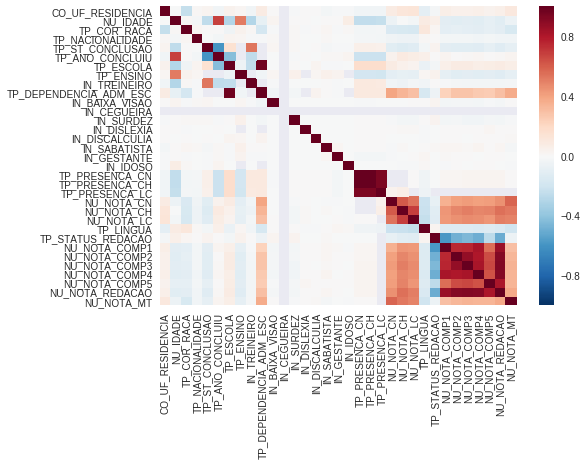

In [0]:
sns.heatmap(train.corr())

**apagar as linhas que tem NU_NOTA_MT como NANs**

In [0]:
train = train[~np.isnan(train.NU_NOTA_MT)]

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              10133 non-null object
CO_UF_RESIDENCIA          10133 non-null int64
SG_UF_RESIDENCIA          10133 non-null object
NU_IDADE                  10133 non-null int64
TP_SEXO                   10133 non-null object
TP_COR_RACA               10133 non-null int64
TP_NACIONALIDADE          10133 non-null int64
TP_ST_CONCLUSAO           10133 non-null int64
TP_ANO_CONCLUIU           10133 non-null int64
TP_ESCOLA                 10133 non-null int64
TP_ENSINO                 3639 non-null float64
IN_TREINEIRO              10133 non-null int64
TP_DEPENDENCIA_ADM_ESC    3639 non-null float64
IN_BAIXA_VISAO            10133 non-null int64
IN_CEGUEIRA               10133 non-null int64
IN_SURDEZ                 10133 non-null int64
IN_DISLEXIA               10133 non-null int64
IN_DISCALCULIA            10133 non-null int64
IN_SABATISTA              10133 non-null

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


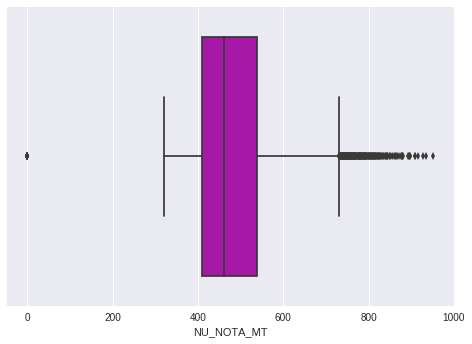

In [0]:
sns.boxplot(train.NU_NOTA_MT, color='m')

In [0]:
train.drop(columns=['SG_UF_RESIDENCIA','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT'], inplace=True)
test.drop(columns=['SG_UF_RESIDENCIA','TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027','CO_PROVA_CN','CO_PROVA_CH','CO_PROVA_LC','CO_PROVA_MT'], inplace=True)

In [0]:
#nao fazer dummie da coluna de inscrição nem das notas de mat
train = pd.get_dummies(train, columns=['TP_SEXO','Q001', 'Q002','Q006', 'Q024', 'Q025', 'Q026', 'Q047'])

test = pd.get_dummies(test, columns=['TP_SEXO','Q001', 'Q002','Q006', 'Q024', 'Q025', 'Q026', 'Q047'])

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Data columns (total 82 columns):
NU_INSCRICAO         10133 non-null object
CO_UF_RESIDENCIA     10133 non-null int64
NU_IDADE             10133 non-null int64
TP_COR_RACA          10133 non-null int64
TP_NACIONALIDADE     10133 non-null int64
TP_ST_CONCLUSAO      10133 non-null int64
TP_ANO_CONCLUIU      10133 non-null int64
TP_ESCOLA            10133 non-null int64
IN_TREINEIRO         10133 non-null int64
IN_BAIXA_VISAO       10133 non-null int64
IN_CEGUEIRA          10133 non-null int64
IN_SURDEZ            10133 non-null int64
IN_DISLEXIA          10133 non-null int64
IN_DISCALCULIA       10133 non-null int64
IN_SABATISTA         10133 non-null int64
IN_GESTANTE          10133 non-null int64
IN_IDOSO             10133 non-null int64
TP_PRESENCA_CN       10133 non-null int64
TP_PRESENCA_CH       10133 non-null int64
TP_PRESENCA_LC       10133 non-null int64
NU_NOTA_CN           10097 non-null float64
NU_NOT

In [0]:
#POUCA PERNDA DE LINHAS POR NANs
train.dropna(axis='index', inplace=True)

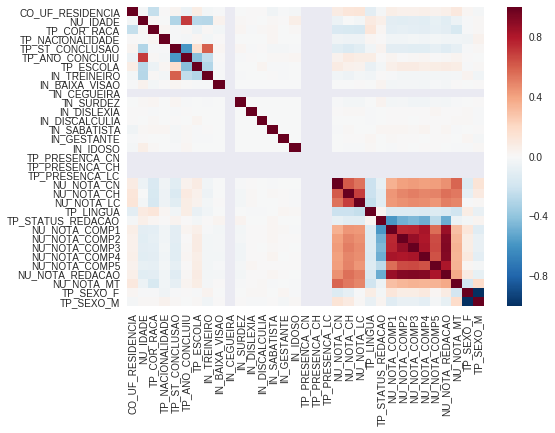

In [0]:
sns.heatmap(train[train.columns[:-48]].corr())

**NU_NOTA_REDACAO com alta colinearidade com NU_NOTA_COMPs... , TP_SEXO também**

In [0]:
train.drop(columns=['NU_NOTA_REDACAO','TP_SEXO_F'], inplace=True)
test.drop(columns=['NU_NOTA_REDACAO','TP_SEXO_F'], inplace=True)

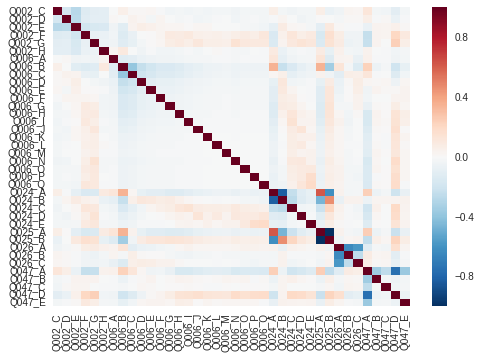

In [0]:
sns.heatmap(train[train.columns[42:]].corr())

**Q025 com colinearidade**

In [0]:
train.drop(columns=['Q025_B'], inplace=True)
test.drop(columns=['Q025_B'], inplace=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


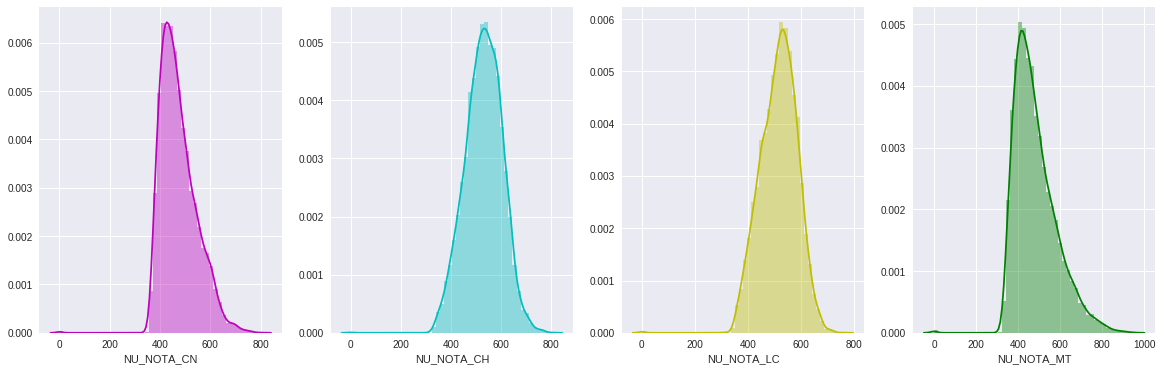

In [0]:
#distribuição das notas nas 5 áreas
fig, ax = plt.subplots(1,4 ,figsize=(20,6))
d1 = sns.distplot(train['NU_NOTA_CN'], ax=ax[0], color='m')
d2 = sns.distplot(train['NU_NOTA_CH'], ax=ax[1], color='c')
d3 = sns.distplot(train['NU_NOTA_LC'], ax=ax[2], color='y')
d4 = sns.distplot(train['NU_NOTA_MT'], ax=ax[3], color='g')

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 78 columns):
NU_INSCRICAO         4576 non-null object
CO_UF_RESIDENCIA     4576 non-null int64
NU_IDADE             4576 non-null int64
TP_COR_RACA          4576 non-null int64
TP_NACIONALIDADE     4576 non-null int64
TP_ST_CONCLUSAO      4576 non-null int64
TP_ANO_CONCLUIU      4576 non-null int64
TP_ESCOLA            4576 non-null int64
IN_TREINEIRO         4576 non-null int64
IN_BAIXA_VISAO       4576 non-null int64
IN_CEGUEIRA          4576 non-null int64
IN_SURDEZ            4576 non-null int64
IN_DISLEXIA          4576 non-null int64
IN_DISCALCULIA       4576 non-null int64
IN_SABATISTA         4576 non-null int64
IN_GESTANTE          4576 non-null int64
IN_IDOSO             4576 non-null int64
TP_PRESENCA_CN       4576 non-null int64
TP_PRESENCA_CH       4576 non-null int64
TP_PRESENCA_LC       4576 non-null int64
NU_NOTA_CN           3442 non-null float64
NU_NOTA_CH           3442 non

In [0]:
test.dropna(axis='index', inplace=True)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [0]:
X = train.drop(columns=['NU_INSCRICAO','NU_NOTA_MT'])
y = train.NU_NOTA_MT

In [0]:
parameters = {'nthread':4, #when use hyperthread, xgboost may become slower
              'objective':'reg:linear',
              'learning_rate': .03, #so called `eta` value
              'max_depth': 5,
              'min_child_weight': 4,
              'silent': 1,
              'subsample': 0.7,
              'colsample_bytree': 0.5,
              'n_estimators': 250}

In [0]:
clf = XGBRegressor(**parameters) # 60, 4
clf.fit( X, y, verbose=False)
pred = clf.predict(test.drop(columns=['NU_INSCRICAO']))

In [0]:
scores = cross_val_score( clf , X, y, cv=3)
scores.mean()

0.4714621985142788

In [0]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test.NU_INSCRICAO
answer['NU_NOTA_MT'] = pred

In [0]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,426.880096
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,446.734894
2,b38a03232f43b11c9d0788abaf060f7366053b6d,592.631836
4,715494628a50142ce8cb17191cfe6d0f3cae0934,540.832336
5,e656d6bad65c93fb2880f1eba5037008c8e75774,493.081482


In [0]:
answer.to_csv('answer.csv', index=False)

In [0]:
from google.colab import files
files.download('answer.csv')